# Diabetes Health Prediction

In [1]:
# Install seaborn
%pip install seaborn

#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

Note: you may need to restart the kernel to use updated packages.


## Data Extraction

In [2]:
df = pd.read_csv('./cleanData.csv')

In [3]:
df.shape
df.head()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
0,2.0,4.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0,3.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0
2,2.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,3.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0
3,2.0,1.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0
4,2.0,1.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0


In [4]:
df = df.fillna(0)
df = df.astype('uint8')
df.head()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
0,2,4,3,2,2,5,1,1,1,3,...,0,0,0,0,0,0,0,1,1,1
1,2,2,2,2,2,4,2,2,2,2,...,0,0,0,0,0,0,0,1,1,1
2,2,2,3,2,2,5,2,2,2,3,...,0,0,0,0,0,0,0,1,1,1
3,2,1,4,2,2,5,2,2,2,5,...,0,0,0,0,0,0,0,1,1,1
4,2,1,3,2,2,5,2,2,2,4,...,0,0,0,0,0,0,0,1,1,1


In [5]:
df.describe()

,Life Satisfaction,Emotional Support,Loneliness,Employment,Food Stamps,Food Insecurity,Bill Insecurity,Utility Insecurity,Transportation Insecurity,Stress,...,Depressed,Sex,Female Sexual Orientation,Transgender,Drunk Family,Drugs In Family,Divorced Parents,Primary Language,Urban or Rural,Health Plan
count,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,...,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000,322749.000000
mean,0.835144,0.938218,2.093246,0.992037,0.989221,2.401377,0.988378,1.001428,1.000641,1.987033,...,0.024889,0.363812,0.059185,0.008096,0.030488,0.013518,0.034838,1.037078,1.110154,0.950166
std,0.918027,1.158771,2.134931,0.977091,0.976148,2.399791,0.976869,0.984069,0.984394,2.094975,...,0.155788,0.693674,0.395943,0.140464,0.171926,0.115480,0.183370,0.194035,0.369856,0.217603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,4.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,5.000000,5.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322749 entries, 0 to 322748
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Life Satisfaction          322749 non-null  uint8
 1   Emotional Support          322749 non-null  uint8
 2   Loneliness                 322749 non-null  uint8
 3   Employment                 322749 non-null  uint8
 4   Food Stamps                322749 non-null  uint8
 5   Food Insecurity            322749 non-null  uint8
 6   Bill Insecurity            322749 non-null  uint8
 7   Utility Insecurity         322749 non-null  uint8
 8   Transportation Insecurity  322749 non-null  uint8
 9   Stress                     322749 non-null  uint8
 10  Diabetes                   322749 non-null  uint8
 11  Marital Status             322749 non-null  uint8
 12  Education Level            322749 non-null  uint8
 13  Own or Rent Home           322749 non-null  uint8
 14  Has 

In [7]:
df.groupby(['Diabetes']).size()

Diabetes
0    271013
1      7625
2     44111
dtype: int64

## Balance Data

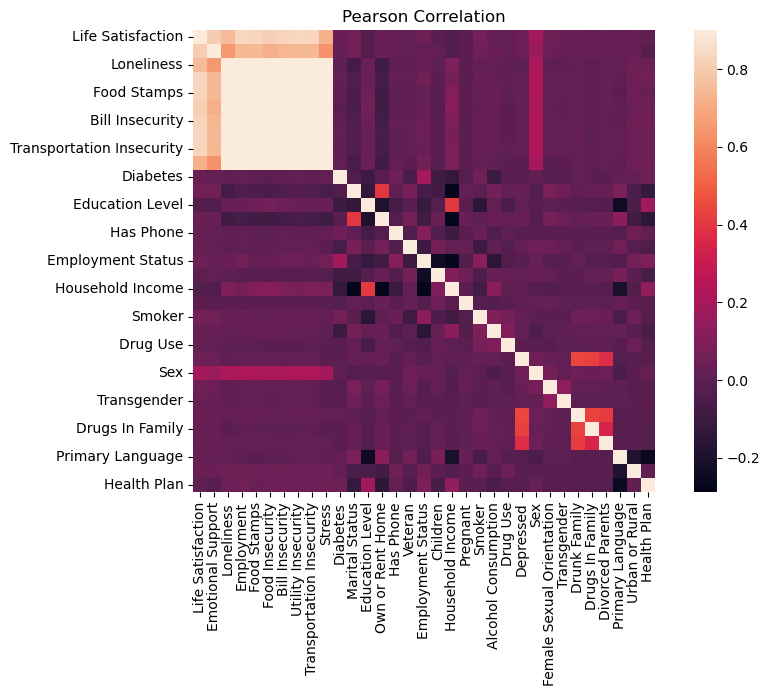

In [8]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [9]:
#Rebalance Data
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_res, y_res = sm.fit_resample(X, y)



Note: you may need to restart the kernel to use updated packages.


In [10]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())

(569127, 32)
(569127,)
(243912, 32)
(243912,)
Diabetes
0    189784
1    189766
2    189577
Name: count, dtype: int64


## Random Forest Model

In [54]:
#build model
rf = RandomForestClassifier(random_state = 42, max_features = 'sqrt', n_estimators=22, class_weight='balanced')
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8252197513857457

## Save Model

In [55]:
import joblib
joblib.dump(rf, "random_forest_model.joblib")
print("Model trained and saved as 'random_forest_model.joblib'")

Model trained and saved as 'random_forest_model.joblib'


In [56]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[0 2 0 ... 2 2 0]


In [57]:
#check MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.4356653219193808
Root Mean Squared Error : 0.6600494844474775


[[69178  2762  9289]
 [ 3845 72993  4409]
 [11922 10404 59110]]


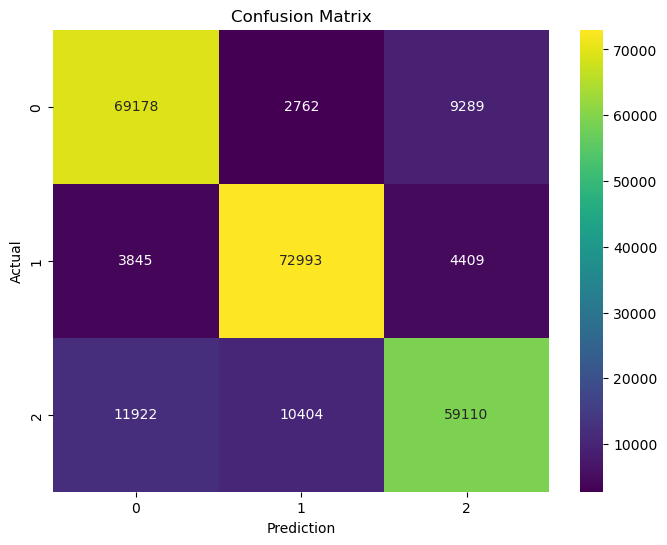

In [58]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [59]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     81229
           1       0.85      0.90      0.87     81247
           2       0.81      0.73      0.77     81436

    accuracy                           0.83    243912
   macro avg       0.82      0.83      0.82    243912
weighted avg       0.82      0.83      0.82    243912



## Check Feature Importance

In [60]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Household Income             0.133131
Education Level              0.080647
Employment Status            0.077934
Marital Status               0.074761
Alcohol Consumption          0.073938
Smoker                       0.051153
Children                     0.048976
Sex                          0.044736
Own or Rent Home             0.042818
Stress                       0.042726
Loneliness                   0.041705
Urban or Rural               0.038126
Emotional Support            0.037838
Life Satisfaction            0.031792
Has Phone                    0.030464
Veteran                      0.026678
Food Insecurity              0.018075
Primary Language             0.010895
Drug Use                     0.009314
Divorced Parents             0.009205
Health Plan                  0.009096
Employment                   0.008815
Drunk Family                 0.008782
Food Stamps                  0.008608
Female Sexual Orientation    0.007469
Transportation Insecurity    0.007353
Bill Insecur

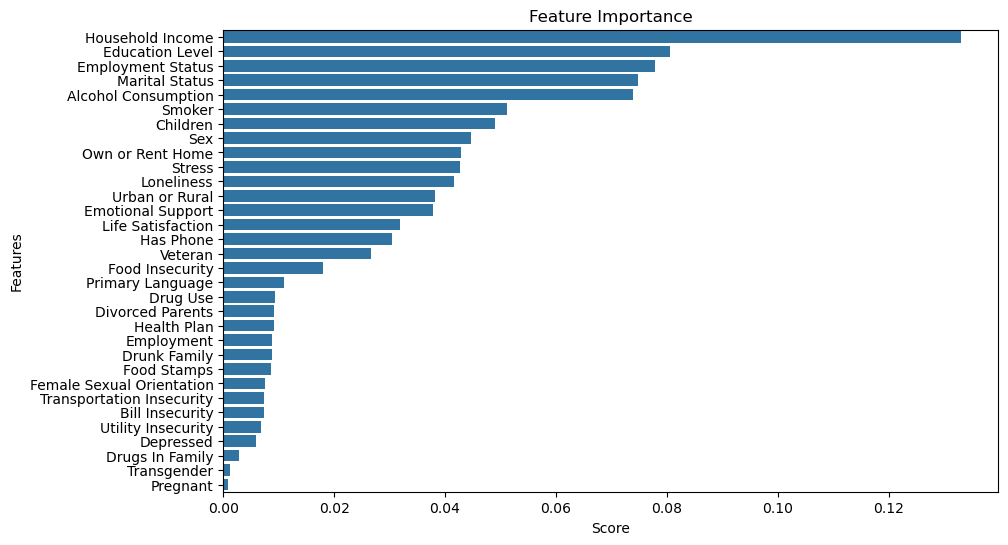

In [61]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [62]:
# #visualize diabetes status
# plt.figure(figsize = (8,6))
# sns.countplot(df['Diabetes'])
# plt.title("Diabetes Status")
# plt.show()